# 1 Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset
import sys
sys.setrecursionlimit(1500)


%matplotlib inline

# 2 The Probelm and the set

data.h5 is a :
* a training set for cat ( y = 1 ) non-cat (y = 0)
* shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB).
* Each image is square (height = num_px) and (width = num_px)

Thus, each image is square (height = num_px) and (width = num_px)

In [2]:
# loading the data/non_cat
# Note: the name for training and set is with orig 
#      since we haven't preprocess them yet, so we add it for preprocess



train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

Each line of the train_set_x_orig and test_set_x_orig is an array representing an image.

to visualize it 

y = [0], it's a 'non-cat' picture.


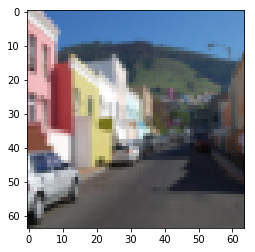

In [3]:
# Example
index = 1
plt.imshow(train_set_x_orig[index])
print("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode('utf-8') + "' picture.")

Below is a function to print the first n images


In [4]:
def print_image(n, train_set, result_set):
    array = list(range(1, n, 1))
    length = len(array)
    for i in range(length):
        print(i)
        plt.imshow(train_set[i])
       # print("y = " + str(result_set[:, index]) + ", it is a '" + classes[np.squeeze(result_set[:, index])].decode('utf-8') + "' picture.")
        

Many bugs in deep learning is along with the matrix, we first keep track of the dimension of the entire set, then use it as a reference

Use shape function in numpy array to get the size, and index = 1

In [5]:
# Start code here # (about 3 lines of code)
m_train = train_set_y.shape[1] # Here the ouput is 209
m_test = test_set_y.shape[1] # Here the output is 50
num_px = train_set_x_orig.shape[1] # Here the output is 64
# End code here #

print("Number of training examples: m_train = " + str(m_train))
print("Number of testing examples: m_test = " + str(m_test))
print("Height/Width of each image: num_px = " + str(num_px))
print("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print("train_set_x_shape: " + str(train_set_x_orig.shape))
print("train_set_y_shape: " + str(train_set_y.shape))
print("test_set_x shape: " + str(test_set_x_orig.shape))
print("test_set_y shape: " + str(test_set_y.shape))



Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x_shape: (209, 64, 64, 3)
train_set_y_shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


From the output the dimension of each image is 64 by 64, we can reshape it into (num_px * num_px * 3, 1)

flatten it-> basicaaly verticalize it into a column stand by itself, so the entire training set shape would be (num_px * num_px * 3, m) 

num_px * num_px * 3-> the flattened column for one single training sample
m-> the number of training samples in the set


After this, our training dataset is a numpy-array where each column represents a flattened image.

There should be m_train (respectively m_test) columns

In [6]:
# Now reshape

train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T


# .T means transpose

print("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print("ttrain_set_y shape: " + str(train_set_y.shape))
print("test_set_x_flatten shape: "+ str(test_set_x_flatten.shape))
print("test_set_y shape: " + str(test_set_y.shape))
print("sanity check after reshaping: " + str(train_set_x_flatten[0:5, 0]))

train_set_x_flatten shape: (12288, 209)
ttrain_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 31 56 22 33]


Standardize the data, basically make everydata in the range of (0, 1)
Common practice:
* Subtract the mean
* Divide the standard deviation

255 is the maximum value of a pixel channel

In [7]:
train_set_x = train_set_x_flatten / 255.
test_set_x = test_set_x_flatten / 255.

common steps for pre-processing a new dataset:

1. figure out the dimensions and shapes of the problem
2. Reshape the datasets such that each example is now a vector of size(num_px * num_px * 3, 1)
3. Standardize the data (last step / 255)

# 3 General Architecture of the learning Algorithm

Mathematical expression of the algorithm:
for one example x(i):


key steps: In this exercise, you will carry out the following steps:

* Initialize the parameters of the model
* Learn the parameters for the model by minimizing the cost
* Use the learned parameters to make predictions (on the test set)
* Analyse the results and conclude


# 4 Building the part of our algorithm

main steps:
1. Define the model structure(such as number of input features)
2. Initilize the model's parameters
3. Loop:
    * calculate current loss(forward propagation)
    * calculate current gradient(backward propagation)
    * Update parameters ( gradient descent)
    
You often build 1-3 seperately and integrate them into one function we call model()



4.1 Helper functions
1. signmoid
2. loss
3. cost


In [8]:
# Graded function: sigmoid

In [9]:
def sigmoid(z): 
    s = 1 / (1 + np.exp(-z))
    return s



In [10]:
print ("sigmoid(0) = " + str(sigmoid(0)))
print ("sigmoid(9.2) = " + str(sigmoid(9.2)))

sigmoid(0) = 0.5
sigmoid(9.2) = 0.999898970806


4.2 Initialize parameters

Initialize w as a vector of zeros. np.zeros() might be good way

In [11]:
def initialize_with_zeros(dim):
    w = np.zeros(shape = (dim, 1))
    b = 0
    
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [12]:
dim = 2
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))


w = [[ 0.]
 [ 0.]]
b = 0


4.3 Forward and Backward propagation


In [14]:
# GRADED FUNCTION: propagate

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    Tips:
    - Write your code step by step for the propagation
    """
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T, X) + b)  # compute activation
    cost = (- 1 / m) * np.sum(Y * np.log(A) + (1 - Y) * (np.log(1 - A)))  # compute cost
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = (1 / m) * np.dot(X, (A - Y).T)
    db = (1 / m) * np.sum(A - Y)

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

w, b, X, Y = np.array([[1], [2]]), 2, np.array([[1,2], [3,4]]), np.array([[1, 0]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

d) Optimization
* You have initialized your parameters.
* You are also able to compute a cost function and its gradient
* Now, update the parameters using gradient descent 

In [20]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    costs = []
    for i in range(num_iterations):
        # Cost and gradient calculation
        grads, cost = propagate(w, b, X, Y)
        
        # Retrieve derivatives from grads
        dw = grads['dw']
        db = grads['db']
        
        #update rule
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        # Rebcord the costs per hundred iterations
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training examples
        if print_cost and i % 100 == 0:
            print("Cost after iteration %i: %f" % (i, cost))
            
    params = {"w": w, 
             "b" : b}
    
    grads = {"dw": dw,
            "db" : db}
    
    return params, grads, costs

In [24]:
params, grads, costs = optimize(w, b, X, Y, num_iterations = 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(costs[0]))

w = [[ 0.1124579 ]
 [ 0.23106775]]
b = 1.55930492484
dw = [[ 0.90158428]
 [ 1.76250842]]
db = 0.430462071679
cost = 6.00006477319


In [25]:
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a the pics is a cat
    A = sigmoid(np.dot(w.T, X) + b)
    
    for i in range(A.shape[1]):
        # Convert probabilities a[0, i] to actual predictions
        Y_prediction[0, i] = 1 if A[0, i] > 0.5 else 0
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction
        

In [26]:
print("predictions = " + str(predict(w, b, X)))


predictions = [[ 1.  1.]]


# Merge all functions into a model

Notation:
* Y_prediction for your predictions on the test set
* Y_prediction_train for your predictions on the train set
* w, costs, grads for the outputs of optimize()

In [27]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, 
          learning_rate = 0.5, print_cost = False):
    
    """
    Arguments:
    X_train-- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)

    Y_train  -- training labels (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels (1, m_test)
    
    hyperparameters:
    learning_rate
    num_iterations
    
    """
    # Initialize parameters with zeros
    w, b = initialize_with_zeros(X_train.shape[0])
    
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w, b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    
    # Print
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

    
    
    
    
    

In [28]:
d = model (train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)



Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


# Example


y = 0, you predicted that it is a "cat" picture.


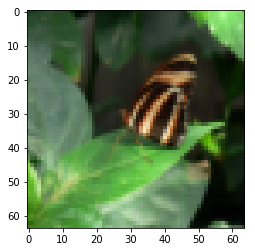

In [29]:
index = 5
plt.imshow(test_set_x[:,index].reshape((num_px, num_px, 3)))
print ("y = " + str(test_set_y[0, index]) + ", you predicted that it is a \"" + classes[d["Y_prediction_test"][0, index]].decode("utf-8") +  "\" picture.")

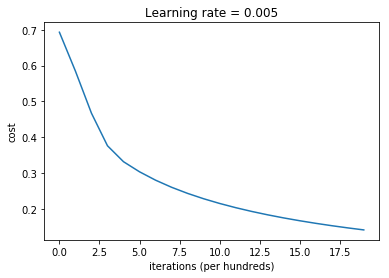

In [32]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate = " + str(d["learning_rate"]))
plt.show()